In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.utils import shuffle
from keras import layers, models
from sklearn.preprocessing import LabelBinarizer

In [2]:
image_dir = "bean/TRAIN"

X_train = []
y_train = []

for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            img = cv2.imread(os.path.join(root, file))
            img = cv2.resize(img, (192, 192))
            X_train.append(np.array(img))
            y_train.append(os.path.basename(root))

X_train = np.array(X_train)
y_train = np.array(y_train)

X_train, y_train = shuffle(X_train, y_train, random_state=42)

print('Données :', X_train.shape)
print('Étiquettes :', y_train.shape)

Données : (5760, 192, 192, 3)
Étiquettes : (5760,)


In [3]:
image_dir = "bean/VAL"

X_val = []
y_val = []

for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            img = cv2.imread(os.path.join(root, file))
            img = cv2.resize(img, (192, 192))
            X_val.append(np.array(img))
            y_val.append(os.path.basename(root))

X_val = np.array(X_val)
y_val = np.array(y_val)

X_val, y_val = shuffle(X_val, y_val, random_state=42)

print('Données :', X_val.shape)
print('Étiquettes :', y_val.shape)

Données : (720, 192, 192, 3)
Étiquettes : (720,)


In [4]:
image_dir = "bean/TEST"

X_test = []
y_test = []

for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            img = cv2.imread(os.path.join(root, file))
            img = cv2.resize(img, (192, 192))
            X_test.append(np.array(img))
            y_test.append(os.path.basename(root))

X_test = np.array(X_test)
y_test = np.array(y_test)

X_test, y_test = shuffle(X_test, y_test, random_state=42)

print('Données :', X_test.shape)
print('Étiquettes :', y_test.shape)

Données : (360, 192, 192, 3)
Étiquettes : (360,)


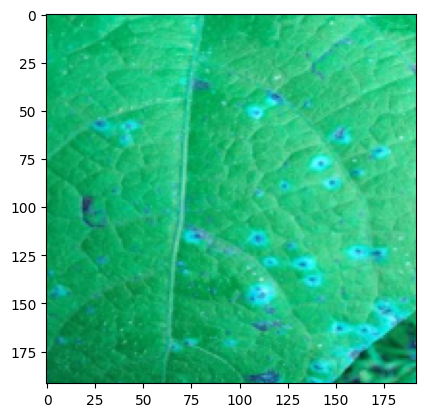

In [5]:
plt.imshow(X_train[1])

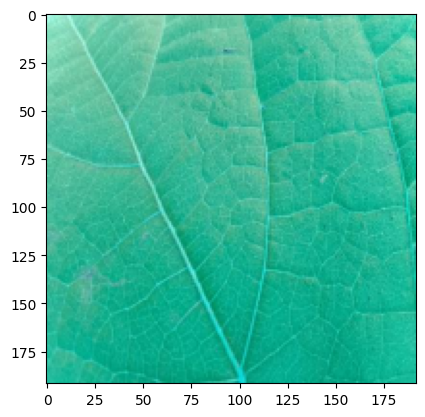

In [6]:
plt.imshow(X_val[1])

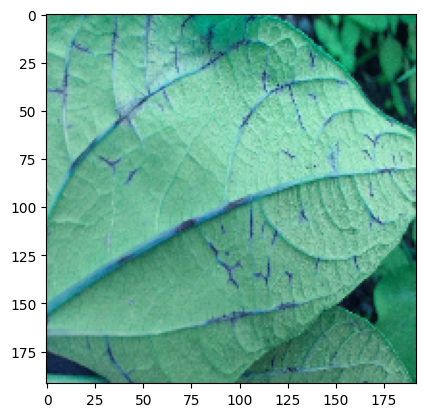

In [7]:
plt.imshow(X_test[1])

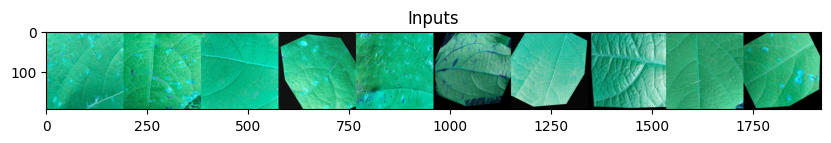

Labels:  ['rust' 'rust' 'healthy' 'rust' 'rust' 'anthracnose' 'healthy' 'healthy'
 'healthy' 'rust']


In [10]:
batch_size = 10

inputs = X_train[0:batch_size,:,:, :]
labels = y_train[0:batch_size]

plt.figure(figsize=(10,5))
plt.imshow(np.hstack(inputs), vmin=0, vmax=255)
plt.title("Inputs")
plt.show()
print("Labels: ", labels)

In [11]:
X_train[0]

array([[[116, 242, 207],
        [118, 245, 210],
        [109, 239, 204],
        ...,
        [ 69, 219, 176],
        [ 82, 227, 185],
        [ 80, 221, 180]],

       [[106, 235, 198],
        [115, 244, 207],
        [109, 240, 203],
        ...,
        [ 65, 215, 172],
        [ 75, 221, 179],
        [ 81, 222, 181]],

       [[102, 233, 196],
        [109, 241, 204],
        [103, 238, 200],
        ...,
        [ 67, 218, 175],
        [ 70, 218, 176],
        [ 74, 219, 177]],

       ...,

       [[  5, 156, 116],
        [ 17, 171, 130],
        [ 23, 177, 136],
        ...,
        [ 16, 160, 123],
        [ 30, 172, 135],
        [ 27, 168, 131]],

       [[  3, 154, 114],
        [  8, 159, 119],
        [ 11, 165, 124],
        ...,
        [ 18, 166, 128],
        [ 18, 164, 126],
        [ 31, 176, 138]],

       [[  5, 154, 114],
        [  6, 157, 117],
        [  7, 161, 120],
        ...,
        [ 10, 161, 122],
        [ 12, 160, 122],
        [ 16, 163, 125]]

In [12]:
lb = LabelBinarizer()
train_label = np.array(lb.fit_transform(y_train))
val_label = np.array(lb.fit_transform(y_val))
test_label = np.array(lb.fit_transform(y_test))

In [13]:
print(y_train[:10])
print(train_label[:10])

['rust' 'rust' 'healthy' 'rust' 'rust' 'anthracnose' 'healthy' 'healthy'
 'healthy' 'rust']
[[0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]


In [14]:
train_im = X_train.astype('float32') / 255.0
val_im = X_val.astype('float32') / 255.0
test_im = X_test.astype('float32') / 255.0

In [15]:
train_im

array([[[[0.45490196, 0.9490196 , 0.8117647 ],
         [0.4627451 , 0.9607843 , 0.8235294 ],
         [0.42745098, 0.9372549 , 0.8       ],
         ...,
         [0.27058825, 0.85882354, 0.6901961 ],
         [0.32156864, 0.8901961 , 0.7254902 ],
         [0.3137255 , 0.8666667 , 0.7058824 ]],

        [[0.41568628, 0.92156863, 0.7764706 ],
         [0.4509804 , 0.95686275, 0.8117647 ],
         [0.42745098, 0.9411765 , 0.79607844],
         ...,
         [0.25490198, 0.84313726, 0.6745098 ],
         [0.29411766, 0.8666667 , 0.7019608 ],
         [0.31764707, 0.87058824, 0.70980394]],

        [[0.4       , 0.9137255 , 0.76862746],
         [0.42745098, 0.94509804, 0.8       ],
         [0.40392157, 0.93333334, 0.78431374],
         ...,
         [0.2627451 , 0.85490197, 0.6862745 ],
         [0.27450982, 0.85490197, 0.6901961 ],
         [0.2901961 , 0.85882354, 0.69411767]],

        ...,

        [[0.01960784, 0.6117647 , 0.45490196],
         [0.06666667, 0.67058825, 0.50980395]

In [16]:
print(f"Dimensions de train_images: {train_im.shape}")
print(f"Dimensions de train_labels: {train_label.shape}")
print(f"Dimensions de validation_images: {val_im.shape}")
print(f"Dimensions de validation_labels: {val_label.shape}")
print(f"Dimensions de test_images: {test_im.shape}")
print(f"Dimensions de test_labels: {test_label.shape}")

Dimensions de train_images: (5760, 192, 192, 3)
Dimensions de train_labels: (5760, 3)
Dimensions de validation_images: (720, 192, 192, 3)
Dimensions de validation_labels: (720, 3)
Dimensions de test_images: (360, 192, 192, 3)
Dimensions de test_labels: (360, 3)


In [17]:
model = models.Sequential()
model.add(layers.Input(shape=(192, 192, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu') )
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu') )
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu') )
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 190, 190, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 95, 95, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 95, 95, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 93, 93, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 46, 46, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 46, 46, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 44, 44, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 247808)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    31,719,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,943,171 (121.85 MB)

 Trainable params: 31,943,171 (121.85 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(train_im, train_label, epochs=5, batch_size=64, validation_data=(val_im, val_label))

Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 232s 3s/step - accuracy: 0.5261 - loss: 1.7286 - val_accuracy: 0.7153 - val_loss: 0.6376
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.7082 - loss: 0.5876 - val_accuracy: 0.6667 - val_loss: 0.6264
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.7265 - loss: 0.5519 - val_accuracy: 0.7847 - val_loss: 0.4823
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 226s 3s/step - accuracy: 0.8068 - loss: 0.4281 - val_accuracy: 0.7778 - val_loss: 0.4768
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.8767 - loss: 0.3300 - val_accuracy: 0.9250 - val_loss: 0.2093


In [21]:
history.history

{'accuracy': [0.629687488079071,
  0.7152777910232544,
  0.746180534362793,
  0.8236111402511597,
  0.8888888955116272],
 'loss': [0.919619083404541,
  0.5744755268096924,
  0.5224530696868896,
  0.4106086790561676,
  0.30188968777656555],
 'val_accuracy': [0.7152777910232544,
  0.6666666865348816,
  0.7847222089767456,
  0.7777777910232544,
  0.925000011920929],
 'val_loss': [0.6376010775566101,
  0.6264317035675049,
  0.4823220670223236,
  0.47681042551994324,
  0.20927326381206512]}

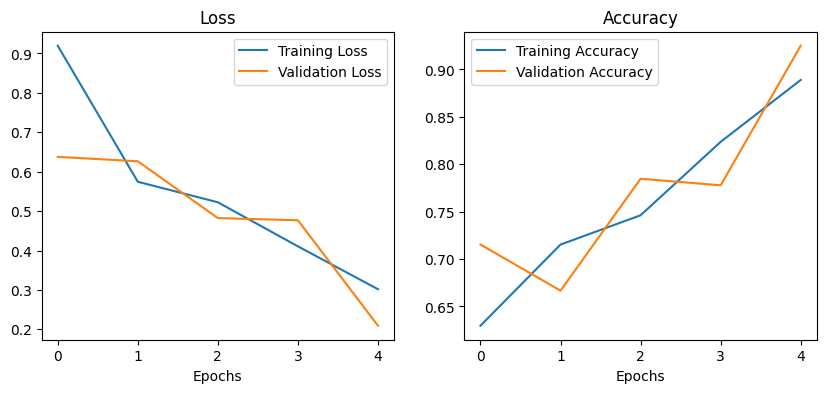

In [22]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epochs')
ax2.legend()

In [23]:
predictions = model.predict(test_im)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step


In [24]:
predictions[0]

array([8.4540134e-06, 7.9139626e-01, 2.0859528e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

1

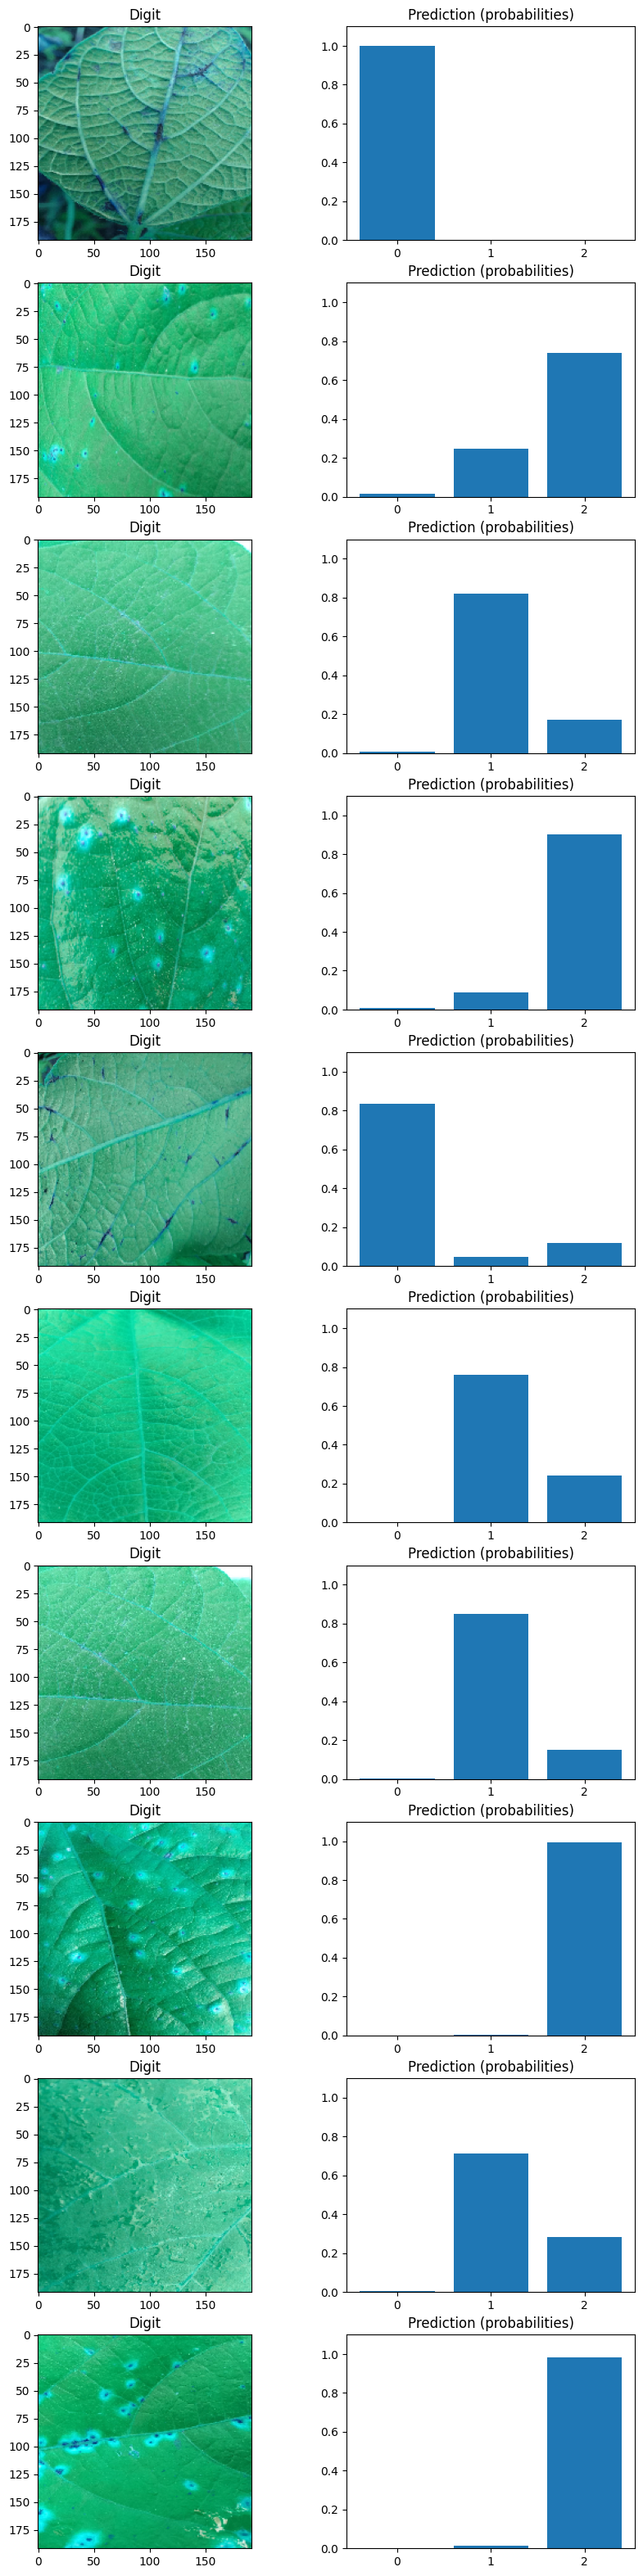

In [26]:
batch_size = 10

inputs  = test_im[batch_size : 10 + batch_size].reshape(batch_size, 192, 192, 3)
outputs = predictions[batch_size : 10 + batch_size]

f, ax = plt.subplots(batch_size,2, figsize=(10,4*batch_size))
for i in range(batch_size):
    ax[i,0].imshow(inputs[i,:,:,:])
    ax[i,0].set_title("Digit")
    ax[i,1].bar(range(3), outputs[i,:])
    ax[i,1].set_title("Prediction (probabilities)")
    ax[i,1].set_xticks(range(3))
    ax[i,1].set_ylim((0,1.1))
    
plt.show()

In [29]:
test_loss, test_acc = model.evaluate(test_im, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - accuracy: 0.9562 - loss: 0.1719


In [31]:
print(f"test_loss: {test_loss}, test_acc: {test_acc}")

test_loss: 0.16824649274349213, test_acc: 0.9611111283302307


In [32]:
model.save('maladie_model.keras')

In [33]:
from keras.models import load_model

a = load_model('maladie_model.keras')


In [46]:
image = cv2.imread("images/feuille1.jpg")

# # Définir le facteur de zoom
# zoom_factor = 5

# # Calculer la taille de la sous-image
# height, width, channels = image.shape
# sub_height = int(height / zoom_factor)
# sub_width = int(width / zoom_factor)

# # Calculer la position du centre de la sous-image
# center_y = int((height - sub_height) / 2)
# center_x = int((width - sub_width) / 2)

# # Extraire la sous-image avec interpolation
# im = cv2.getRectSubPix(image, (sub_width, sub_height), (center_x, center_y))

# plt.imshow(im)


In [48]:
#comment l'utiliser sur nos images

im = cv2.resize(image, (192, 192))
im = im.astype('float32') / 255.0
im = im.reshape(1, 192, 192, 3)

im.shape

(1, 192, 192, 3)

In [49]:
#ne pas oublier le reshape pour avoir une image avec les bonnes dimensions
y_pred = a.predict(im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [50]:
np.argmax(y_pred)

1

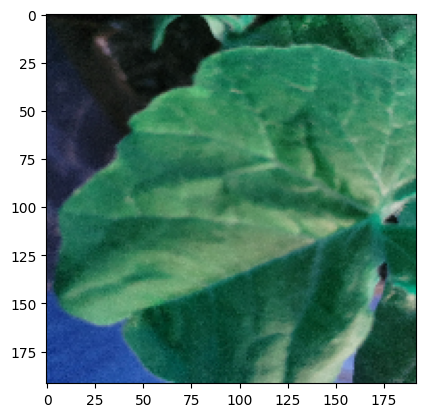

In [51]:
plt.imshow(im.squeeze(0))